In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def capture_images():
    cap1 = cv2.VideoCapture(0)
    cap2 = cv2.VideoCapture(1)

    images = []
    for i in range(2):
        cv2.waitKey(2500)
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if ret1:
            frame_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
            images.append(frame_rgb)
            cv2.imshow('Capture Image Camera 1', frame1)
        else:
            print("Failed to capture image")

        if ret2:
            frame_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
            images.append(frame_rgb)
            cv2.imshow('Capture Image Camera 2', frame2)
        else:
            print("Failed to capture image")

    print(images)

    cap1.release()
    cap2.release()
    cv2.destroyAllWindows()
    return images

# Capture images
images = capture_images()

[array([[[130, 103,  64],
        [129, 101,  63],
        [129, 101,  63],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[130, 103,  64],
        [130, 103,  64],
        [129, 101,  63],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[132, 104,  65],
        [130, 103,  64],
        [130, 103,  64],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [191, 208, 202],
        [190, 207, 201],
        [190, 207, 201]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [192, 208, 202],
        [192, 206, 201],
        [191, 207, 201]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [193, 207, 202],
        [192, 206, 201],
        [191, 205, 200]

In [17]:
right_image = images[0]
left_image = images[1]

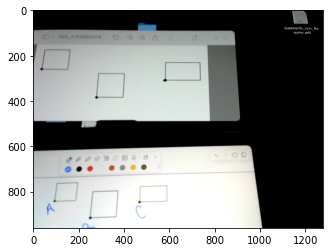

In [65]:
plt.imshow(left_image)

In [40]:
image_list = [right_image, left_image]

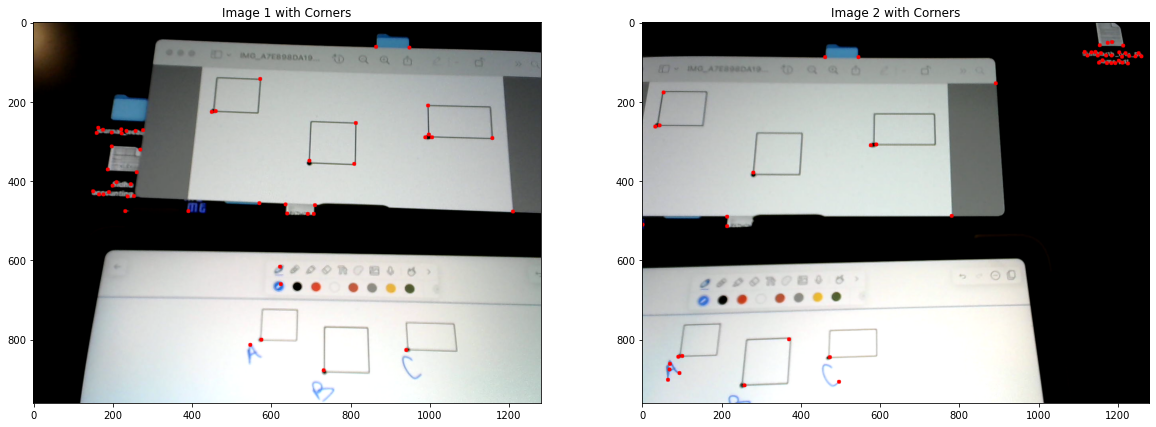

In [44]:
def detect_corners(images):
    corner_images = []
    all_corners = []
    for img in images:
        img_copy = img.copy()
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
        corners = np.int0(corners)

        img_corners = []
        for i in corners:
            x, y = i.ravel()
            cv2.circle(img_copy, (x, y), radius=5, color=(255, 0, 0), thickness=-1)
            img_corners.append((x, y))

        corner_images.append(img_copy)
        all_corners.append(img_corners)
    return corner_images, all_corners

corner_images, all_corners = detect_corners(image_list)

plt.figure(figsize=(20, 10))
for i, img in enumerate(corner_images):
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(f'Image {i+1} with Corners')
plt.show()

In [63]:
# Matched Corner through Visual Inspection

# print([corner for corner in all_corners[0] if corner[0] < 1000 and corner[1] > 800])
# print([corner for corner in all_corners[1] if corner[0] > 400 and corner[1] > 800 and corner[0] < 550])

In [2]:
# REAL WORLD POINTS

right_camera_relative_3d_locations_in_inches = {
    "A Tablet" : (-3.6875, 5, 8.5,),
    "B Tablet" : (-2.5625, 4.0625, 8.5,),
    "C Tablet" : (-1.1875, 4.9375, 8.5,),
    "A Monitor" : (-5.1875, 10.125, 9.8125,),
    "B Monitor" : (-3.125, 9, 9.8125,),
    "C Monitor" : (-0.625, 9.5, 9.8125,),
}

left_camera_relative_3d_locations_in_inches = {
    "A Tablet" : (-1, 5, 8.5,),
    "B Tablet" : (0.125, 4.0625, 8.5,),
    "C Tablet" : (1.5, 4.9375, 8.5,),
    "A Monitor" : (-2.4375, 10.125, 9.8125,),
    "B Monitor" : (-0.375, 9, 9.8125,),
    "C Monitor" : (2.125, 9.5, 9.8125,),
}

# CORRESPONDING IMAGE POINTS

right_camera_image_points = {
    "A Tablet" : (91, 843), #########
    "B Tablet" : (258, 915), #########
    "C Tablet" : (473, 844), #########
    "A Monitor" : (44, 260), #########
    "B Monitor" : (280, 379), #########
    "C Monitor" : (590, 308), #########
}

left_camera_image_points = {
    "A Tablet" : (575, 800), #########
    "B Tablet" : (732, 877), #########
    "C Tablet" : (940, 826), #########
    "A Monitor" : (460, 224), #########
    "B Monitor" : (696, 349), #########
    "C Monitor" : (1005, 290), #########
}

distance_between_cameras_inches = 2.75

In [68]:
# corner_right_camera = [corner for corner in all_corners[0]]
# corner_left_camera = [corner for corner in all_corners[1]]

# # Save as numpy files
# np.save('corner_right_camera.npy', corner_right_camera)
# np.save('corner_left_camera.npy', corner_left_camera)

In [3]:
# Convert to meters and to numpy arrays for calculations

object_points_inches = np.array([
    [-3.6875, 5, 8.5],
    [-2.5625, 4.0625, 8.5],
    [-1.1875, 4.9375, 8.5],
    [-5.1875, 10.125, 9.8125],
    [-3.125, 9, 9.8125],
    [-0.625, 9.5, 9.8125]
], dtype=np.float32)
object_points_meters = object_points_inches * 0.0254  # Convert inches to meters

# Image points from both cameras
image_points_right = np.array([
    [91, 843],
    [258, 915],
    [473, 844],
    [44, 260],
    [280, 379],
    [590, 308]
], dtype=np.float32)

image_points_left = np.array([
    [575, 800],
    [732, 877],
    [940, 826],
    [460, 224],
    [696, 349],
    [1005, 290]
], dtype=np.float32)

In [4]:
# Camera resolution
resolution_width, resolution_height = 1280, 720  # 720p resolution

# Diagonal field of view in degrees and its conversion to radians
diagonal_fov_degrees = 55
diagonal_fov_radians = np.deg2rad(diagonal_fov_degrees)

# Calculate the diagonal size of the image in pixels
image_diagonal = np.sqrt(resolution_width**2 + resolution_height**2)

# Calculate focal length in pixels
focal_length_pixels = (image_diagonal / 2) / np.tan(diagonal_fov_radians / 2)

# Define the camera matrix based on the calculated focal length
camera_matrix = np.array([
    [focal_length_pixels, 0, resolution_width / 2],
    [0, focal_length_pixels, resolution_height / 2],
    [0, 0, 1]
], dtype=np.float32)

# Assuming no lens distortion
dist_coeffs = np.zeros(4)

# Prepare object points for SolvePnP function
objp = object_points_meters.reshape(-1, 1, 3)

# Solve for camera parameters
_, rvec_right, tvec_right = cv2.solvePnP(objp, image_points_right, camera_matrix, dist_coeffs)
_, rvec_left, tvec_left = cv2.solvePnP(objp, image_points_left, camera_matrix, dist_coeffs)

# Convert rotation vectors to rotation matrices
R_right, _ = cv2.Rodrigues(rvec_right)
R_left, _ = cv2.Rodrigues(rvec_left)

# Create the projection matrices by concatenating rotation matrices and translation vectors
P_right = np.hstack((R_right, tvec_right))
P_left = np.hstack((R_left, tvec_left))

# Compute the final camera matrices
camera_matrix_right = camera_matrix @ P_right
camera_matrix_left = camera_matrix @ P_left

# Print the results
print("Right Camera Matrix:")
print(camera_matrix_right)
print("\nLeft Camera Matrix:")
print(camera_matrix_left)

Right Camera Matrix:
[[ 1.54192223e+03  1.10467606e+02  9.80495530e+01  1.54842461e+02]
 [ 2.66088398e+02 -1.40994759e+03 -2.46141690e+02  5.14966901e+02]
 [ 4.72006310e-01 -1.23611715e-02 -8.81508505e-01  5.42479027e-01]]

Left Camera Matrix:
[[-1.04514824e+02  5.83464687e+02  1.43107882e+03  5.14537518e+04]
 [ 1.41473913e+03  3.15313663e+02  1.35762490e+02  3.96420679e+04]
 [ 2.78339886e-02  9.98727429e-01  4.20569972e-02  7.08113145e+01]]


In [5]:
# Save matrices as numpy files
np.save('camera_matrix_right.npy', camera_matrix_right)
np.save('camera_matrix_left.npy', camera_matrix_left)